In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

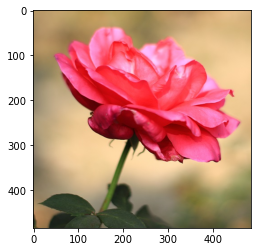

In [2]:
img = cv2.cvtColor(cv2.imread('rose.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [3]:
img.shape

(485, 485, 3)

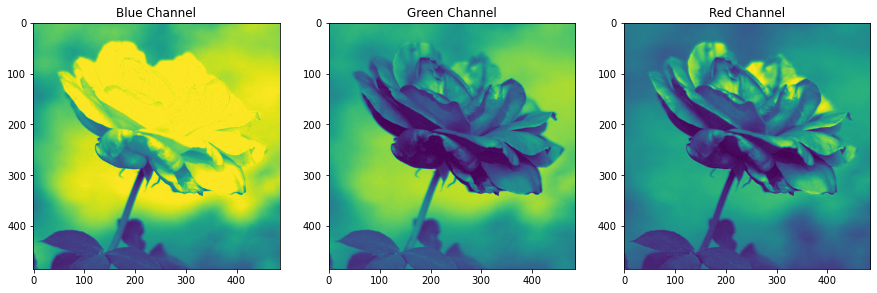

In [4]:
blue,green,red = cv2.split(img)

fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)

fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)

fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)

plt.show()

In [5]:
s_blue = blue/255
s_green = green/255
s_red = red/255

In [6]:
class PCA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.explained_variance_ = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        centered_data = X - self.mean

        cov_matrix = np.cov(centered_data, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        self.explained_variance_ = eigenvalues
        self.components = eigenvectors

        if self.n_components is not None:
            self.components = eigenvectors[:, :self.n_components]
            self.explained_variance_ = eigenvalues[:self.n_components]

        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio_ = self.explained_variance_ / total_variance

    def transform(self, X):
        centered_data = X - self.mean
        reduced_data = centered_data.dot(self.components)
        return reduced_data

    def inverse_transform(self,compressed_image):
        return np.dot(compressed_image,  (self.components).T) + self.mean

In [7]:
pca_b = PCA(n_components=11)
pca_b.fit(s_blue)
trans_pca_b = pca_b.transform(s_blue)

pca_g = PCA(n_components=11)
pca_g.fit(s_green)
trans_pca_g = pca_g.transform(s_green)

pca_r = PCA(n_components=11)
pca_r.fit(s_red)
trans_pca_r = pca_r.transform(s_red)

print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(485, 11)
(485, 11)
(485, 11)


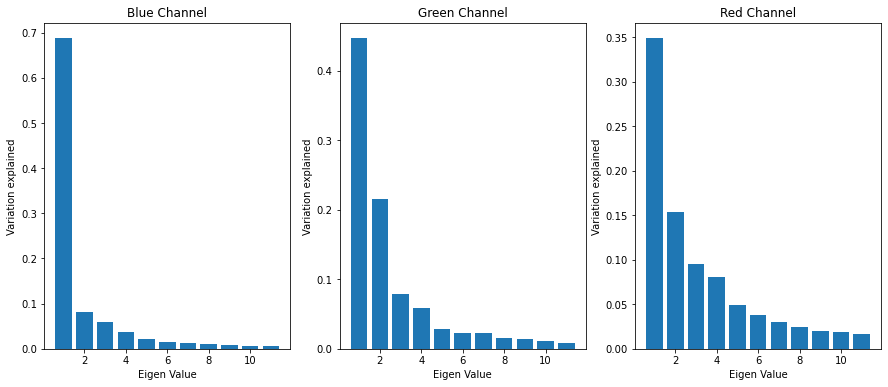

In [8]:
fig = plt.figure(figsize = (15, 6)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,12)),pca_b.explained_variance_ratio_)

fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,12)),pca_g.explained_variance_ratio_)

fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,12)),pca_r.explained_variance_ratio_)
plt.show()

In [9]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(485, 485) (485, 485) (485, 485)


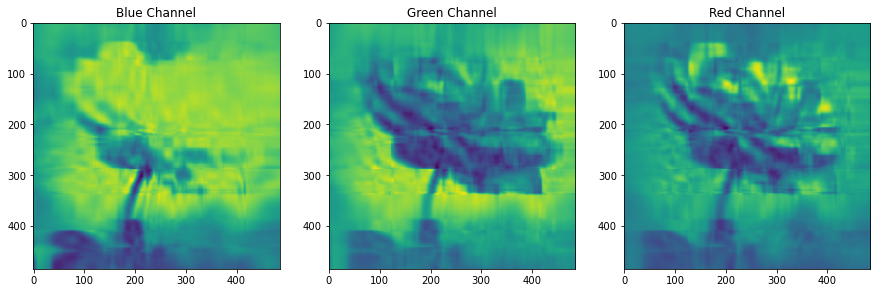

In [10]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(b_arr)

fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(g_arr)

fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(r_arr)

In [11]:
img_reduced= cv2.merge((b_arr, g_arr, r_arr))
print(img_reduced.shape)

(485, 485, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


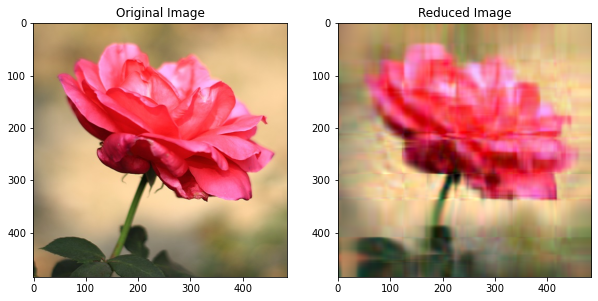

In [12]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)

fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()